# Lecture 9: Optimization

Optimization is everywhere:
 * finance
 * machine learning, big data, and statistics
 * logistics and planning
 * control theory

Three main approaches:
 * Coordinate Descent
 * Gradient Descent
 * Stochastic Gradient Descent

## Coordinate descent

 1. Fix all but one cooridnate (randomly), and optimizie that one, e.g. via binary search or analytically.
 2. If not converged GOTO 1.

## Steepest Descent

AKA gradient descent. Compute gradient, scale down, and go in opposite direction. Guaranteed to converge to (local or global) optimum.

$$
\nabla f = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \dots, \frac{\partial f}{\partial x_D} \right)^T
$$


### SGD

Sample one data point $n$ at each time step, and compute gradient of objective function $f$ only for that point. (In practice, use mini-batches.)

Why does SGD work? Because it offers an **unbiased** estimate of the gradient. I.e. $\mathbb{E}[\nabla f_n(x)] = \nabla f(x)$ when sampling $n$ randomly.

This has no guarantees on variance though. We can end up taking a very long time to reach the optimum.

## Constrained Optimization

### Constrained optimization problem

$$
\begin{align*}
\text{minimize} && f(x) \\
\text{subject to} && x \in Q \subseteq \mathbb{R}^D \\
\end{align*}
$$

Two ways to solve a constrained problem: 

  - A. Projected gradient descent.
  - B. Transform constrained problem into unconstrained one.
  
Good resources on convex optimization: https://stanford.edu/~boyd/cvxbook/

### Saddle point example

In [17]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

<IPython.core.display.Javascript object>


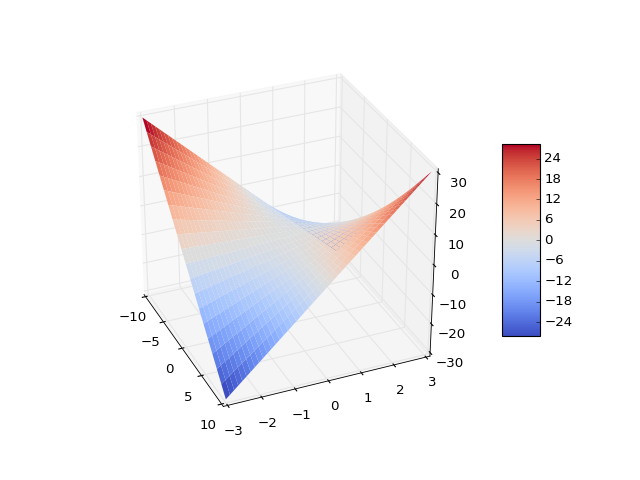

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-10.0, 10.0, num=20)
Y = np.copy(xs)
X, Y = np.meshgrid(X, Y)
Z = X * Y
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=5)

### A. Projected Gradient Descent

$$
x^{(t+1)} \gets \operatorname{Proj}_Q \left[ x^{(t)} - \eta \nabla_x f(x^{(t)}) \right]
$$

where

$$
\operatorname{Proj}_Q (x) = {\arg\!\min}_{y \in Q} \| y - x \|
$$

N.B.: $x$ represents the model parameters in this example, **not** the dataset itself.


### B. Turning Constrained Problems into Unconstrained Ones

Integrate constraints as "brick wall functions" in main objective:

$$ \min_{x\in Q} f(x) \mapsto \min_{x} ( f(x) + I_Q(x) ) $$

Where:

$$
I_Q = \left\{ \begin{aligned}
 0 & & x \in Q \\
 \infty & & x \not\in Q \\
 \end{aligned} \right.
$$

Problem? Objective no longer continuous!

Solution? Use softer penalty function instead.

Want to minimize unconstrained problem equivalent to constrained primal problem.

$$
\min_x \left( f(x) + \sum_{i=1}^m I_{-}(g_i(x)) + \sum_{i=1}^p I_0(h_i(x)) \right)
$$

$$
\left( f(x) + \sum_{i=1}^m I_{-}(g_i(x)) + \sum_{i=1}^p I_0(h_i(x)) \right)
\ge
\left( f(x) + \sum_{i=1}^m \lambda_i g_i(x) + \sum_{i=1}^p \nu_i h_i(x) \right)
=: L(x, \mathbf{\lambda}, \mathbf{\nu})
$$

$$
\min_x \text{LHS}
\ge
\underbrace{\inf_x L(x, \mathbf{\lambda}, \mathbf{\nu})}_{\text{Lagrange dual function}}
$$

The **Lagrange dual function** is a lower bound on the primal value f(x) of any feasible x.

$\lambda_i \ge 0$, since these constraints map to the inequalities. The $\nu_i$ have no such constraint.

We now define the **Lagrange dual function** as:

$$
\mathcal{D}(\lambda, \nu) := \inf_x L(x, \lambda, \nu) \in \mathbb{R}
$$

$$
\mathcal{D}(\lambda, \nu) \le f(x) + Is
$$